# Import Library

In [2]:
#importing libraries for data handling and analysis
import pandas as pd
import numpy as np
import os

#importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import plotly.express as px

#importing warnings to avoid any future warnings
import warnings

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Reading Dataset

In [3]:
df = pd.read_excel('C:/Users/Syifa Ayu Talitha M/Documents/Intern ASDP/EMPLOYEEATT/data/Penurunan Kinerja PT ASDP Indonesia Ferry (Persero) Tahun 2024.xlsx')
pd.pandas.set_option('display.max_columns', None)


df.head(5)

,Usia,Attrition,BusinessTravel,GajiHarian,Department,JarakRumah,Pendidikan,BidangPendidikan,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,KepuasanKerja,StatusPernikahan,PenghasilanBulanan,GajiBulanan,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Ya,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Perempuan,94,3,2,Eksekutif Sales,4,Lajang,5993,19479,8,Y,Ya,11,3,1,80,0,8,0,1,6,4,0,5
1,49,TIDAK,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Pria,61,2,2,Ilmuwan Penelitian,2,Telah menikah,5130,24907,1,Y,TIDAK,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Ya,Travel_Rarely,1373,Research & Development,2,2,Lainnya,1,4,4,Pria,92,2,1,Teknisi Laboratorium,3,Lajang,2090,2396,6,Y,Ya,15,3,2,80,0,7,3,3,0,0,0,0
3,33,TIDAK,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Perempuan,56,3,1,Ilmuwan Penelitian,3,Telah menikah,2909,23159,1,Y,Ya,11,3,3,80,0,8,3,3,8,7,3,0
4,27,TIDAK,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Pria,40,3,1,Teknisi Laboratorium,2,Telah menikah,3468,16632,9,Y,TIDAK,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
# memeriksa dataset, nilai null dan total entri dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Usia                      1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   GajiHarian                1470 non-null   int64 
 4   Department                1470 non-null   object
 5   JarakRumah                1470 non-null   int64 
 6   Pendidikan                1470 non-null   int64 
 7   BidangPendidikan          1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Pre-Process

In [6]:
# memeriksa apakah ada nilai yang hilang dalam data
df.isnull().values.any()

np.False_

In [7]:
# check nilai yang duplikat
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns.unique()

Index(['Usia', 'Attrition', 'BusinessTravel', 'GajiHarian', 'Department',
       'JarakRumah', 'Pendidikan', 'BidangPendidikan', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'KepuasanKerja',
       'StatusPernikahan', 'PenghasilanBulanan', 'GajiBulanan',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Exploratory Data Analysis

## Exploring Numerical Columns

In [9]:
df.describe()

,Usia,GajiHarian,JarakRumah,Pendidikan,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,KepuasanKerja,PenghasilanBulanan,GajiBulanan,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Dapat Diketahui : 

Usia minimum adalah `18 tahun` dan usia maksimum adalah `60 tahun`.

Jarak dari rumah ke kantor minimum `1 KM` dan maksimum `29 KM`

Demikian pula dapat memeriksa semua nilai minimum, maksimum, rata-rata, deviasi standar, 25%, 50%, 75% dari semua kolom numerik.

## Exploring Categorical Columns

In [10]:
df.describe(include = 'object')

,Attrition,BusinessTravel,Department,BidangPendidikan,Gender,JobRole,StatusPernikahan,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,4,3,3,6,4,16,6,1,4
top,TIDAK,Travel_Rarely,Research & Development,Life Sciences,Pria,Eksekutif Sales,Telah menikah,Y,TIDAK
freq,930,1043,961,606,845,323,593,1470,964


'count' akan memberi jumlah baris unik. Yaitu `1470`

'unique' adalah nilai unik yang ada di setiap kolom.

'top' adalah nilai unik yang muncul lebih sering

'freq' adalah jumlah kemunculan nilai 'top'

## Exploring Unique values of categorical columns

In [11]:
# Mapping nilai kategorikal ke dalam bahasa Indonesia yang konsisten

df['Attrition'] = df['Attrition'].replace({
    'Ya': 'YA',
    'Yes': 'YA',
    'TIDAK': 'TIDAK',
    'No': 'TIDAK'
})

df['OverTime'] = df['OverTime'].replace({
    'Ya': 'YA',
    'Yes': 'YA',
    'TIDAK': 'TIDAK',
    'No': 'TIDAK'
})

df["Gender"] = df["Gender"].replace({
    "Male": "Pria",
    "Female": "Wanita",
    "Perempuan": "Wanita"
})

# Mapping job role ke kategori konsisten
jobrole_mapping = {
    "Eksekutif Sales": "Sales Executive",
    "Perwakilan Sales": "Sales Representative",
    "Ilmuwan Penelitian": "Research Scientist",
    "Teknisi Laboratorium": "Laboratory Technician",
    "Direktur Pabrikan": "Manufacturing Director",
    "Perwakilan perawatan kesehatan": "Healthcare Representative",
    "Manajer": "Manager",
    "Direktur Penelitian": "Research Director",
    # yang sudah benar tetap sama
    "Sales Executive": "Sales Executive",
    "Research Scientist": "Research Scientist",
    "Laboratory Technician": "Laboratory Technician",
    "Manufacturing Director": "Manufacturing Director",
    "Healthcare Representative": "Healthcare Representative",
    "Manager": "Manager",
    "Sales Representative": "Sales Representative",
    "Research Director": "Research Director",
    "Human Resources": "Human Resources"
}

# Terapkan mapping ke kolom JobRole
df["JobRole"] = df["JobRole"].replace(jobrole_mapping)

# Mapping status pernikahan ke dalam bahasa Indonesia yang konsisten
df['StatusPernikahan'] = df['StatusPernikahan'].replace({
    'Single': 'Lajang',
    'Married': 'Menikah',
    'Divorced': 'Cerai',
    'Telah menikah': 'Menikah'
})

# Lihat hasil
print(df['Attrition'].value_counts())
print(df.head())

Attrition
TIDAK    1233
YA        237
Name: count, dtype: int64
   Usia Attrition     BusinessTravel  GajiHarian              Department  \
0    41        YA      Travel_Rarely        1102                   Sales   
1    49     TIDAK  Travel_Frequently         279  Research & Development   
2    37        YA      Travel_Rarely        1373  Research & Development   
3    33     TIDAK  Travel_Frequently        1392  Research & Development   
4    27     TIDAK      Travel_Rarely         591  Research & Development   

   JarakRumah  Pendidikan BidangPendidikan  EmployeeCount  EmployeeNumber  \
0           1           2    Life Sciences              1               1   
1           8           1    Life Sciences              1               2   
2           2           2          Lainnya              1               4   
3           3           4    Life Sciences              1               5   
4           2           1          Medical              1               7   

   EnvironmentSa

In [12]:
df

,Usia,Attrition,BusinessTravel,GajiHarian,Department,JarakRumah,Pendidikan,BidangPendidikan,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,KepuasanKerja,StatusPernikahan,PenghasilanBulanan,GajiBulanan,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,YA,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Wanita,94,3,2,Sales Executive,4,Lajang,5993,19479,8,Y,YA,11,3,1,80,0,8,0,1,6,4,0,5
1,49,TIDAK,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Pria,61,2,2,Research Scientist,2,Menikah,5130,24907,1,Y,TIDAK,23,4,4,80,1,10,3,3,10,7,1,7
2,37,YA,Travel_Rarely,1373,Research & Development,2,2,Lainnya,1,4,4,Pria,92,2,1,Laboratory Technician,3,Lajang,2090,2396,6,Y,YA,15,3,2,80,0,7,3,3,0,0,0,0
3,33,TIDAK,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Wanita,56,3,1,Research Scientist,3,Menikah,2909,23159,1,Y,YA,11,3,3,80,0,8,3,3,8,7,3,0
4,27,TIDAK,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Pria,40,3,1,Laboratory Technician,2,Menikah,3468,16632,9,Y,TIDAK,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,TIDAK,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Pria,41,4,2,Laboratory Technician,4,Menikah,2571,12290,4,Y,TIDAK,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,TIDAK,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Pria,42,2,3,Healthcare Representative,1,Menikah,9991,21457,4,Y,TIDAK,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,TIDAK,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Pria,87,4,2,Manufacturing Director,2,Menikah,6142,5174,1,Y,YA,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,TIDAK,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Pria,63,2,2,Sales Executive,2,Menikah,5390,13243,2,Y,TIDAK,14,3,4,80,0,17,3,2,9,6,0,8


In [13]:
df

,Usia,Attrition,BusinessTravel,GajiHarian,Department,JarakRumah,Pendidikan,BidangPendidikan,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,KepuasanKerja,StatusPernikahan,PenghasilanBulanan,GajiBulanan,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,YA,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Wanita,94,3,2,Sales Executive,4,Lajang,5993,19479,8,Y,YA,11,3,1,80,0,8,0,1,6,4,0,5
1,49,TIDAK,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Pria,61,2,2,Research Scientist,2,Menikah,5130,24907,1,Y,TIDAK,23,4,4,80,1,10,3,3,10,7,1,7
2,37,YA,Travel_Rarely,1373,Research & Development,2,2,Lainnya,1,4,4,Pria,92,2,1,Laboratory Technician,3,Lajang,2090,2396,6,Y,YA,15,3,2,80,0,7,3,3,0,0,0,0
3,33,TIDAK,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Wanita,56,3,1,Research Scientist,3,Menikah,2909,23159,1,Y,YA,11,3,3,80,0,8,3,3,8,7,3,0
4,27,TIDAK,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Pria,40,3,1,Laboratory Technician,2,Menikah,3468,16632,9,Y,TIDAK,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,TIDAK,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Pria,41,4,2,Laboratory Technician,4,Menikah,2571,12290,4,Y,TIDAK,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,TIDAK,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Pria,42,2,3,Healthcare Representative,1,Menikah,9991,21457,4,Y,TIDAK,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,TIDAK,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Pria,87,4,2,Manufacturing Director,2,Menikah,6142,5174,1,Y,YA,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,TIDAK,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Pria,63,2,2,Sales Executive,2,Menikah,5390,13243,2,Y,TIDAK,14,3,4,80,0,17,3,2,9,6,0,8


In [14]:
# Cek hasil unique values
print(df["OverTime"].unique())

['YA' 'TIDAK']


In [15]:
#to explore unique values in the categorical columns
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ":" + str(df[column].unique()))
    print(df[column].value_counts())
    print("---------------------------------------------------------------------")

Attrition:['YA' 'TIDAK']
Attrition
TIDAK    1233
YA        237
Name: count, dtype: int64
---------------------------------------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
---------------------------------------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
---------------------------------------------------------------------
BidangPendidikan:['Life Sciences' 'Lainnya' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
BidangPendidikan
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Lainnya              82
Human Resources      27
Name: count, dtype: int64
---------------------------------

Bahwa variabel EmployeeCount, Over18, dan StandardHours hanya memiliki satu nilai unik, sedangkan EmployeeNumber memiliki 1470 nilai unik yang berbeda untuk setiap karyawan. Oleh karena itu, variabel-variabel tersebut tidak memberikan informasi yang relevan bagi analisis dan tidak berkontribusi pada pembangunan model prediksi. Dengan demikian, saya memutuskan untuk menghapus kolom-kolom tersebut dari data penelitian.

## Cleaning Dataset by dropping unwanted columns
Pembersihan data akan memungkinkan untuk menghapus fitur yang tidak diperlukan dari Dataset dan menghindari bias dalam machine learning.

In [16]:
#removing unwanted columns
df = df.drop('Over18', axis = 1)
df = df.drop('EmployeeNumber', axis = 1)
df = df.drop('StandardHours', axis = 1)
df = df.drop('EmployeeCount', axis = 1)

In [17]:
#checking shape of dataset after dropping unwanted columns
df.shape


(1470, 31)

# Data Visualization
Dalam penelitian ini, saya menggunakan visualisasi data karena hasilnya lebih mudah untuk diinterpretasikan dan dianalisis. Visualisasi membantu saya memperoleh wawasan penting dari dataset yang digunakan. Untuk mendukung proses eksplorasi, saya memanfaatkan pustaka Python yang umum dan kuat dalam visualisasi data, yaitu Matplotlib dan Seaborn.

## Exploration of Numerical Columns using Histograms 
Dalam penelitian ini, saya mengeksplorasi seluruh kolom numerik menggunakan fungsi df.hist(). Visualisasi ini membantu saya untuk memahami data dengan lebih baik, melihat bagaimana distribusi data, serta mengidentifikasi adanya outlier pada dataset.


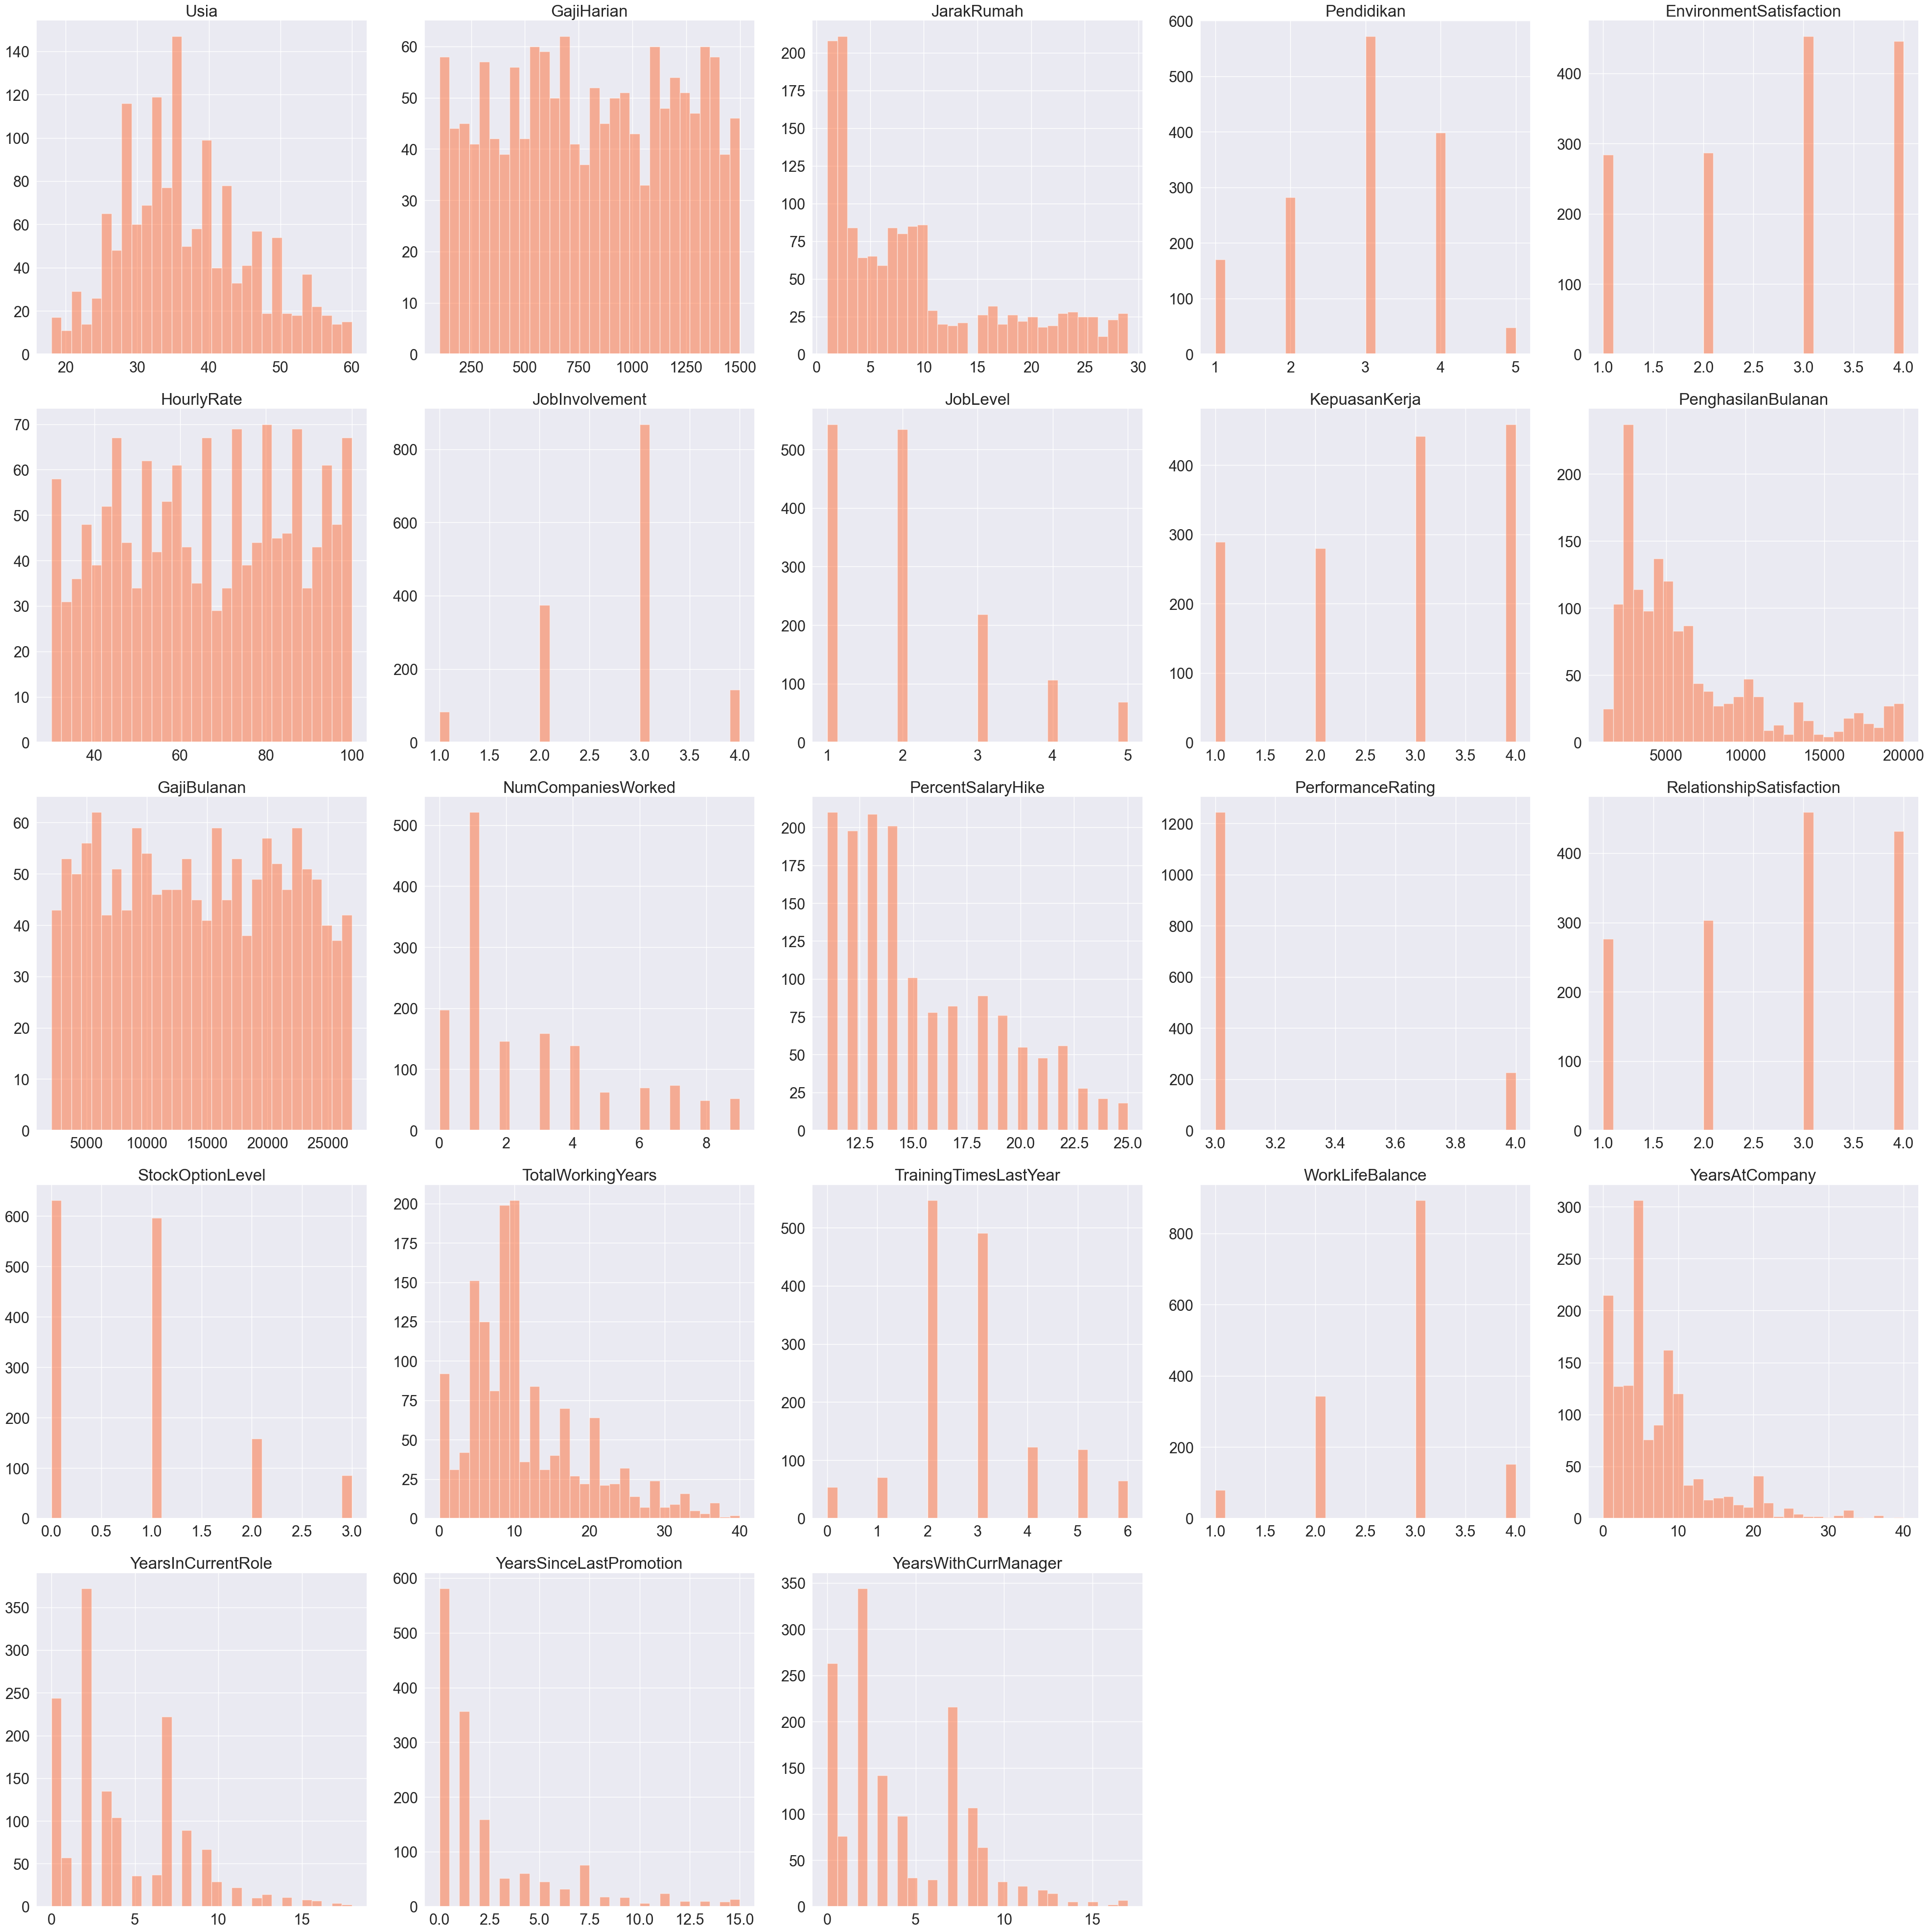

In [18]:
# Define color palette
my_palette = sns.color_palette('rainbow')

# Set font size
sns.set(font_scale=2)

# Plot histogram

df.hist(bins=30, figsize=(40,40), color=my_palette[5], alpha=0.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.tight_layout()
plt.show()

Hasil visualisasi histogram menunjukkan bahwa:

Beberapa variabel seperti PenghasilanBulanan, JarakRumah, JobLevel, dan YearsAtCompany memiliki distribusi miring ke kanan, yang menunjukkan bahwa sebagian besar karyawan memiliki nilai relatif rendah pada variabel-variabel tersebut, sementara hanya sedikit yang memiliki nilai sangat tinggi..

Variabel Pendidikan, EnvironmentSatisfaction, JobInvolvement, JobRole, KepuasanKerja, dan RelationshipSatisfaction miring ke kiri, yang mengindikasikan mayoritas karyawan berpendidikan baik serta puas dengan pekerjaan dan lingkungan kerjanya.

Distribusi Usia mendekati normal dengan kemiringan ke kanan, mayoritas karyawan berusia 25–45 tahun.

Variabel kompensasi dan pengalaman kerja seperti JobLevel, NumCompaniesWorked, PercentSalaryHike, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, dan YearsWithCurrManager juga miring ke kanan, menunjukkan sebagian besar nilai berada pada batas bawah.

### Exploration of Categorical columns


menggunakan pustaka Seaborn dan Matplotlib untuk visualisasinya. subplot dan countplot untuk merepresentasikan visualnya.

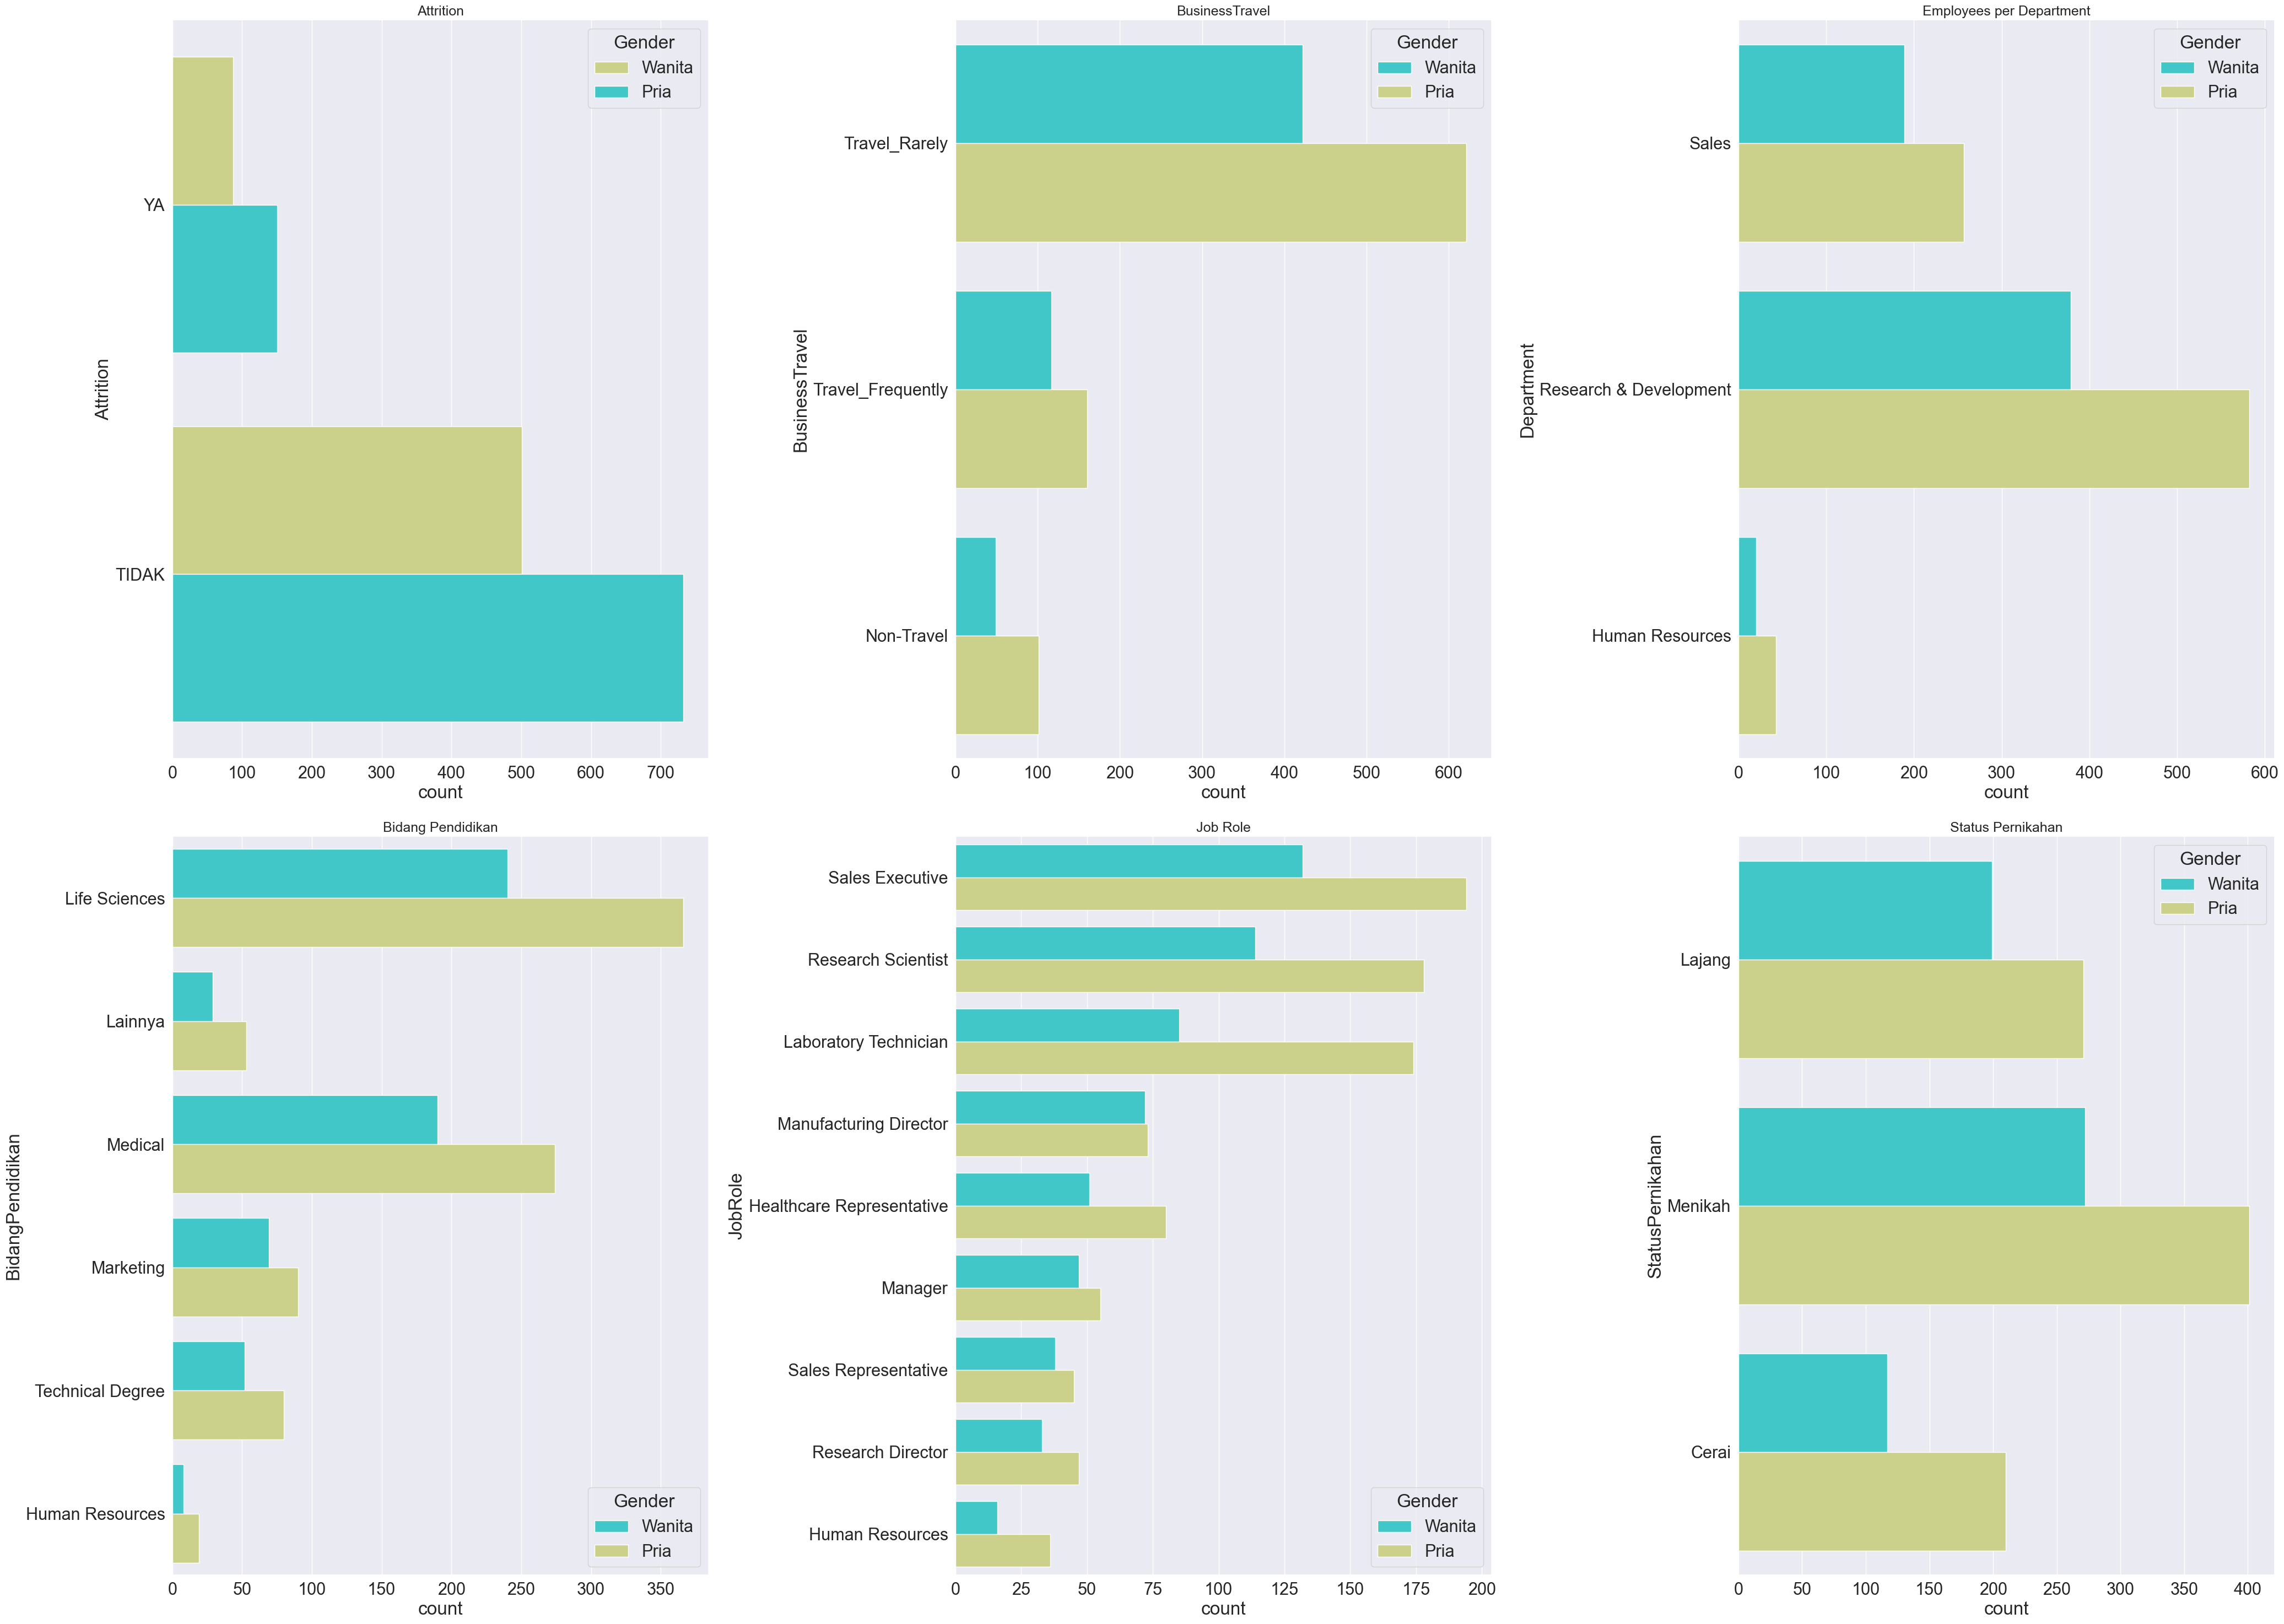

In [19]:
fig = plt.figure(figsize=(42,30))

# subplot #1
plt.subplot(2,3,1)
plt.title('Attrition', fontsize=18)
sns.countplot(data=df, y='Attrition', hue="Gender", palette='rainbow_r', orient="h")

# subplot #2
plt.subplot(2,3,2)
plt.title('BusinessTravel', fontsize=18)
sns.countplot(data=df, y='BusinessTravel', hue='Gender', palette='rainbow', orient="h")

# subplot #3
plt.subplot(2,3,3)
plt.title('Employees per Department', fontsize=18)
sns.countplot(data=df, y='Department', hue='Gender', palette='rainbow', orient="h")

# subplot #4
plt.subplot(2,3,4)
plt.title('Bidang Pendidikan', fontsize=18)
sns.countplot(data=df, y='BidangPendidikan', hue='Gender', palette='rainbow', orient="h")

# subplot #5
plt.subplot(2,3,5)
plt.title('Job Role', fontsize=18)
sns.countplot(data=df, y='JobRole', hue='Gender', palette='rainbow', orient="h")

# subplot #6
plt.subplot(2,3,6)
plt.title('Status Pernikahan', fontsize=18)
sns.countplot(data=df, y='StatusPernikahan', hue='Gender', palette='rainbow', orient="h")

# Adjust plot spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()

Dari hasil visualisasi countplot dapat diamati bahwa:

Countplot menampilkan distribusi kategori berdasarkan jenis kelamin karyawan.

Visualisasi ini memberikan gambaran mengenai berbagai sub-kategori dan frekuensinya dengan mengacu pada Gender karyawan.

Tingkat Attrition lebih tinggi pada karyawan laki-laki dibandingkan perempuan.

Secara umum, jumlah karyawan laki-laki mendominasi pada hampir semua kategori, yang mengindikasikan bahwa karyawan perempuan masih tertinggal atau menghadapi tantangan dalam dunia korporasi.

C:\Users\Syifa Ayu Talitha M\AppData\Local\Temp\ipykernel_12988\1955150336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0, 0], data=df, x='Usia', y='Gender', palette='rainbow')
C:\Users\Syifa Ayu Talitha M\AppData\Local\Temp\ipykernel_12988\1955150336.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0, 1], data=df, x='JarakRumah', y='Gender', palette='rainbow')
C:\Users\Syifa Ayu Talitha M\AppData\Local\Temp\ipykernel_12988\1955150336.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1, 0], data=d

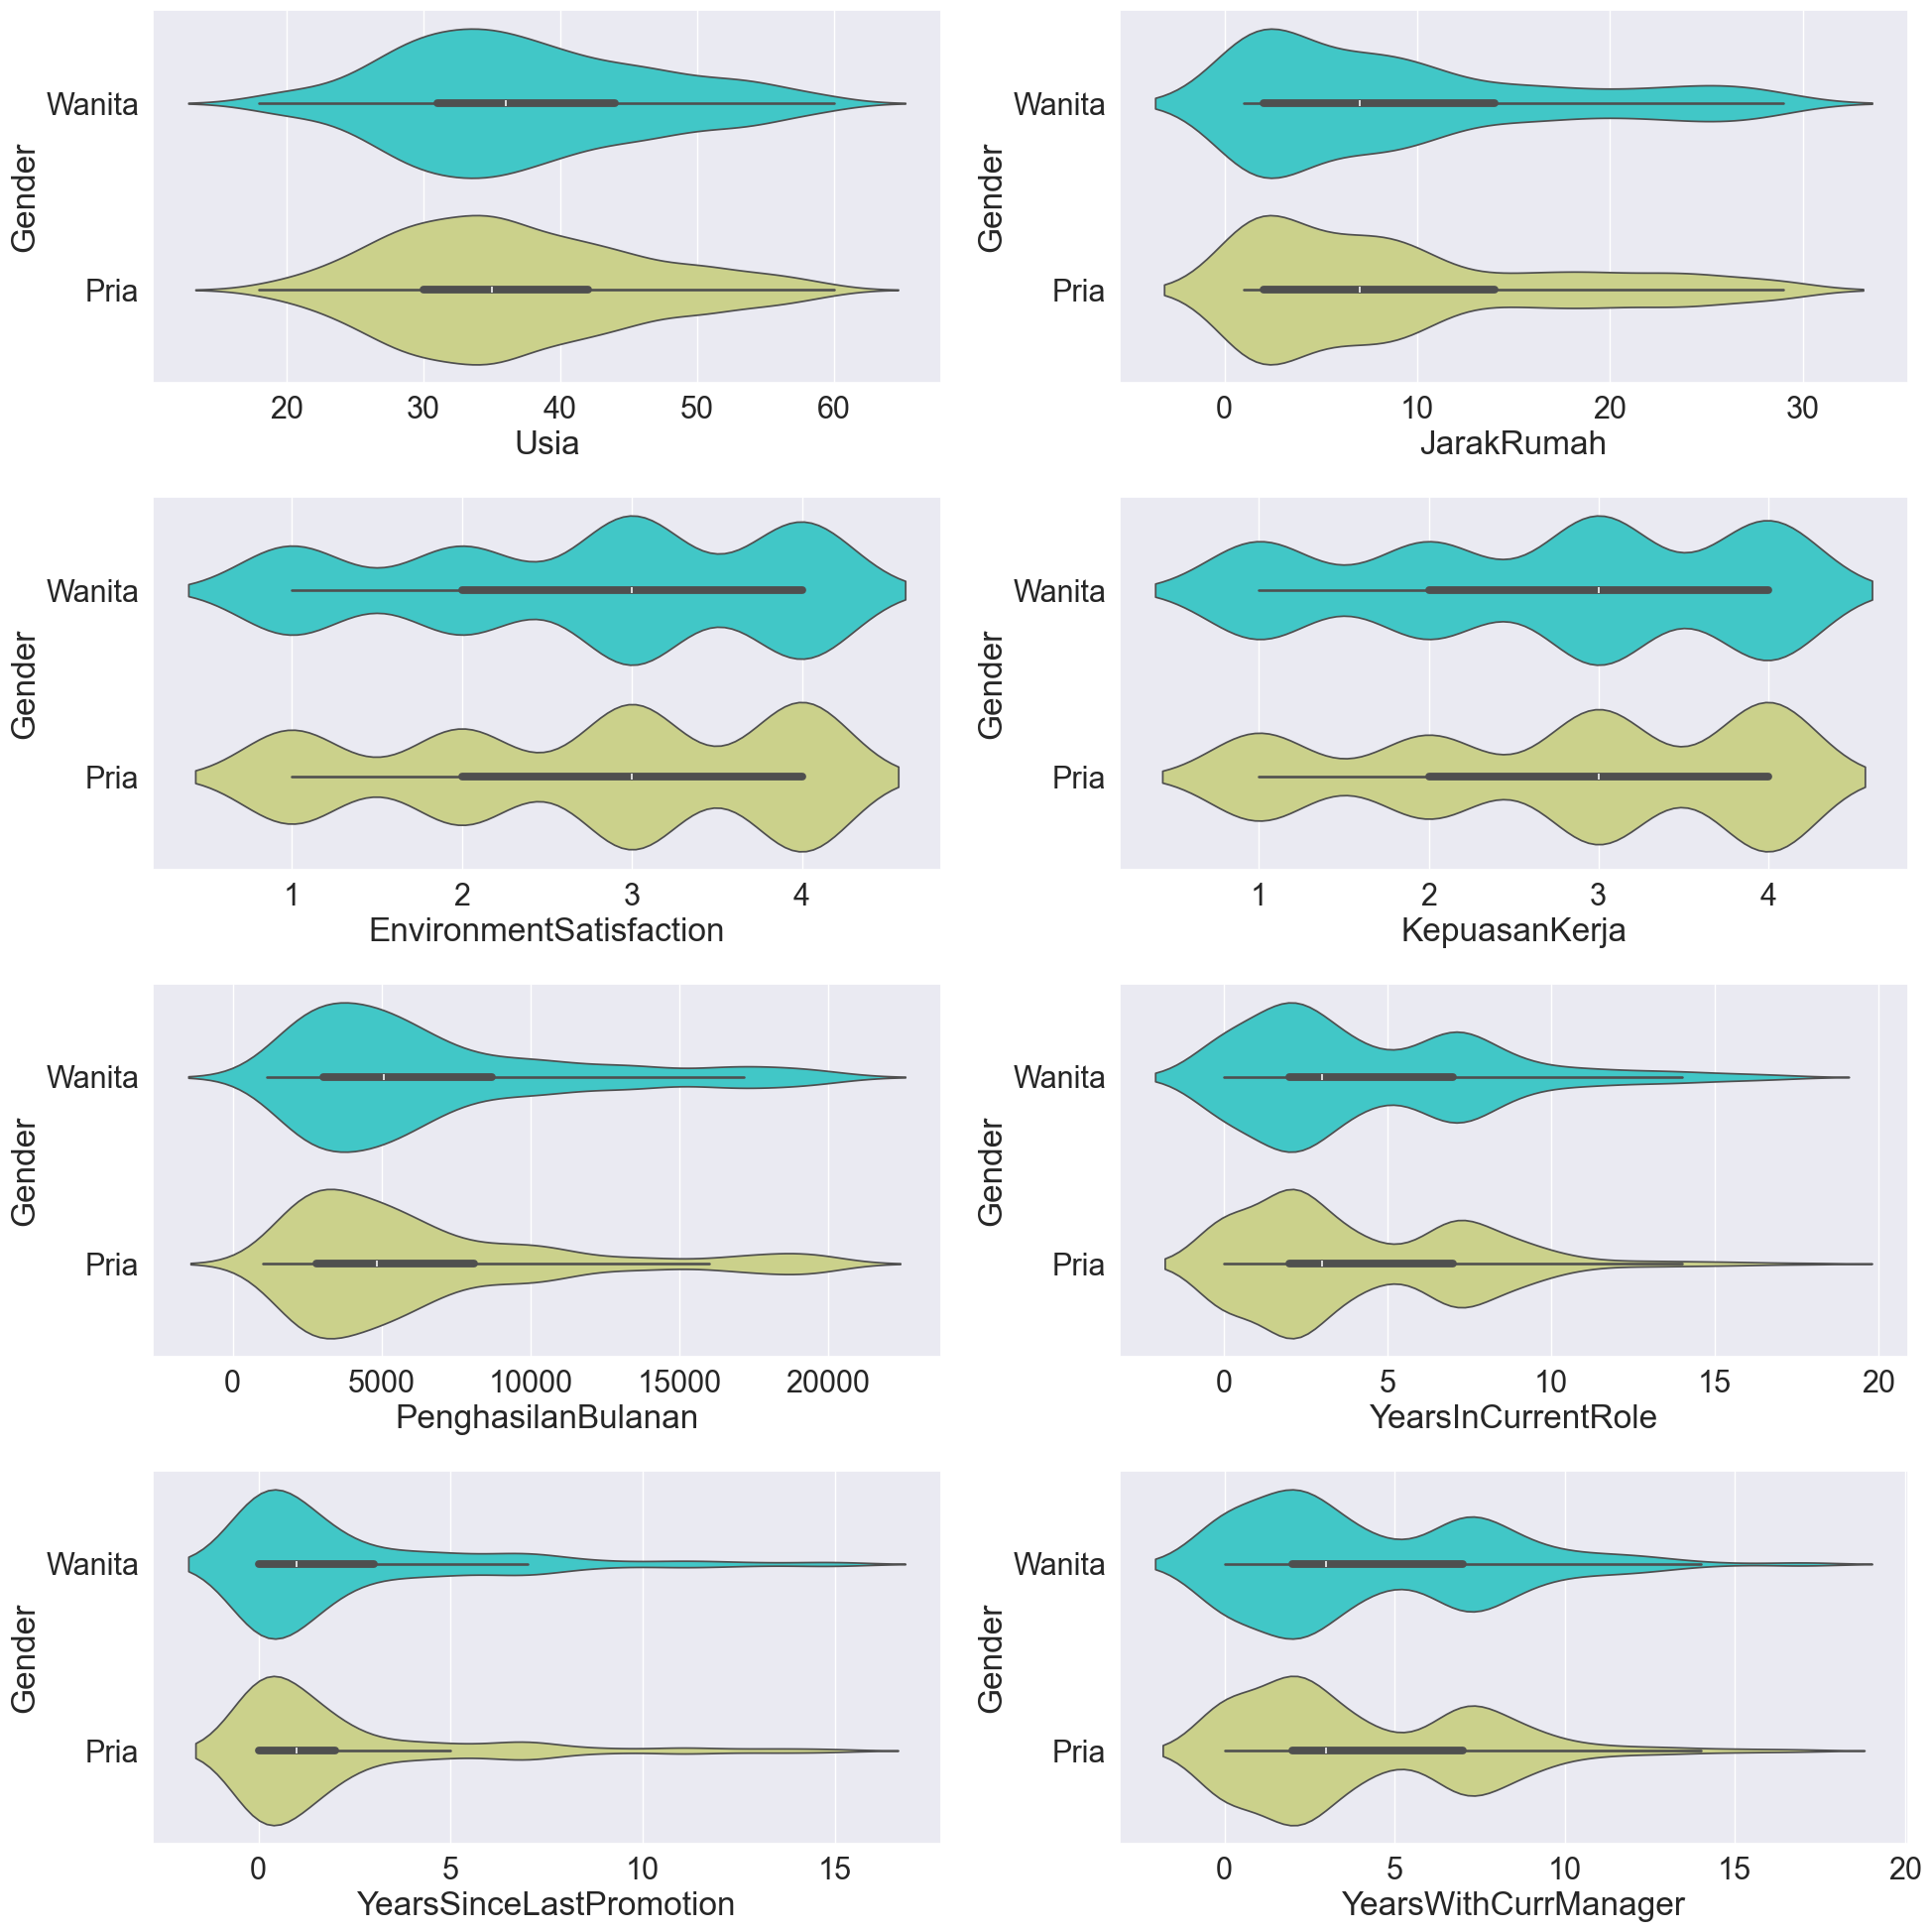

In [20]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

sns.violinplot(ax=axes[0, 0], data=df, x='Usia', y='Gender', palette='rainbow')
sns.violinplot(ax=axes[0, 1], data=df, x='JarakRumah', y='Gender', palette='rainbow')
sns.violinplot(ax=axes[1, 0], data=df, x='EnvironmentSatisfaction', y='Gender', palette='rainbow')
sns.violinplot(ax=axes[1, 1], data=df, x='KepuasanKerja', y='Gender', palette='rainbow')
sns.violinplot(ax=axes[2, 0], data=df, x='PenghasilanBulanan', y='Gender', palette='rainbow')
sns.violinplot(ax=axes[2, 1], data=df, x='YearsInCurrentRole', y='Gender', palette='rainbow')
sns.violinplot(ax=axes[3, 0], data=df, x='YearsSinceLastPromotion', y='Gender', palette='rainbow')
sns.violinplot(ax=axes[3, 1], data=df, x='YearsWithCurrManager', y='Gender', palette='rainbow')

plt.tight_layout()
plt.show()

Dari hasil visualisasi violinplot dapat diamati bahwa:

Violinplot memudahkan interpretasi distribusi atribut numerik, termasuk mendeteksi adanya outlier dalam dataset.

Distribusi untuk sebagian besar atribut pada kedua gender relatif merata.

Rata-rata usia karyawan berada pada rentang 30–40 tahun, sedangkan jarak rumah sebagian besar karyawan berkisar antara 2–10 km.

Distribusi penghasilan bulanan sebagian besar berada pada kisaran 2.500–5.000.

Interpretasi serupa juga dapat dilakukan pada atribut numerik lainnya yang ditampilkan.

### To Check for Correlation

melihat korelasi antar seluruh kolom numerik untuk memahami hubungan dan ketergantungan di antara variabel-variabel tersebut. Korelasi menunjukkan sejauh mana dua variabel saling berhubungan secara linear.

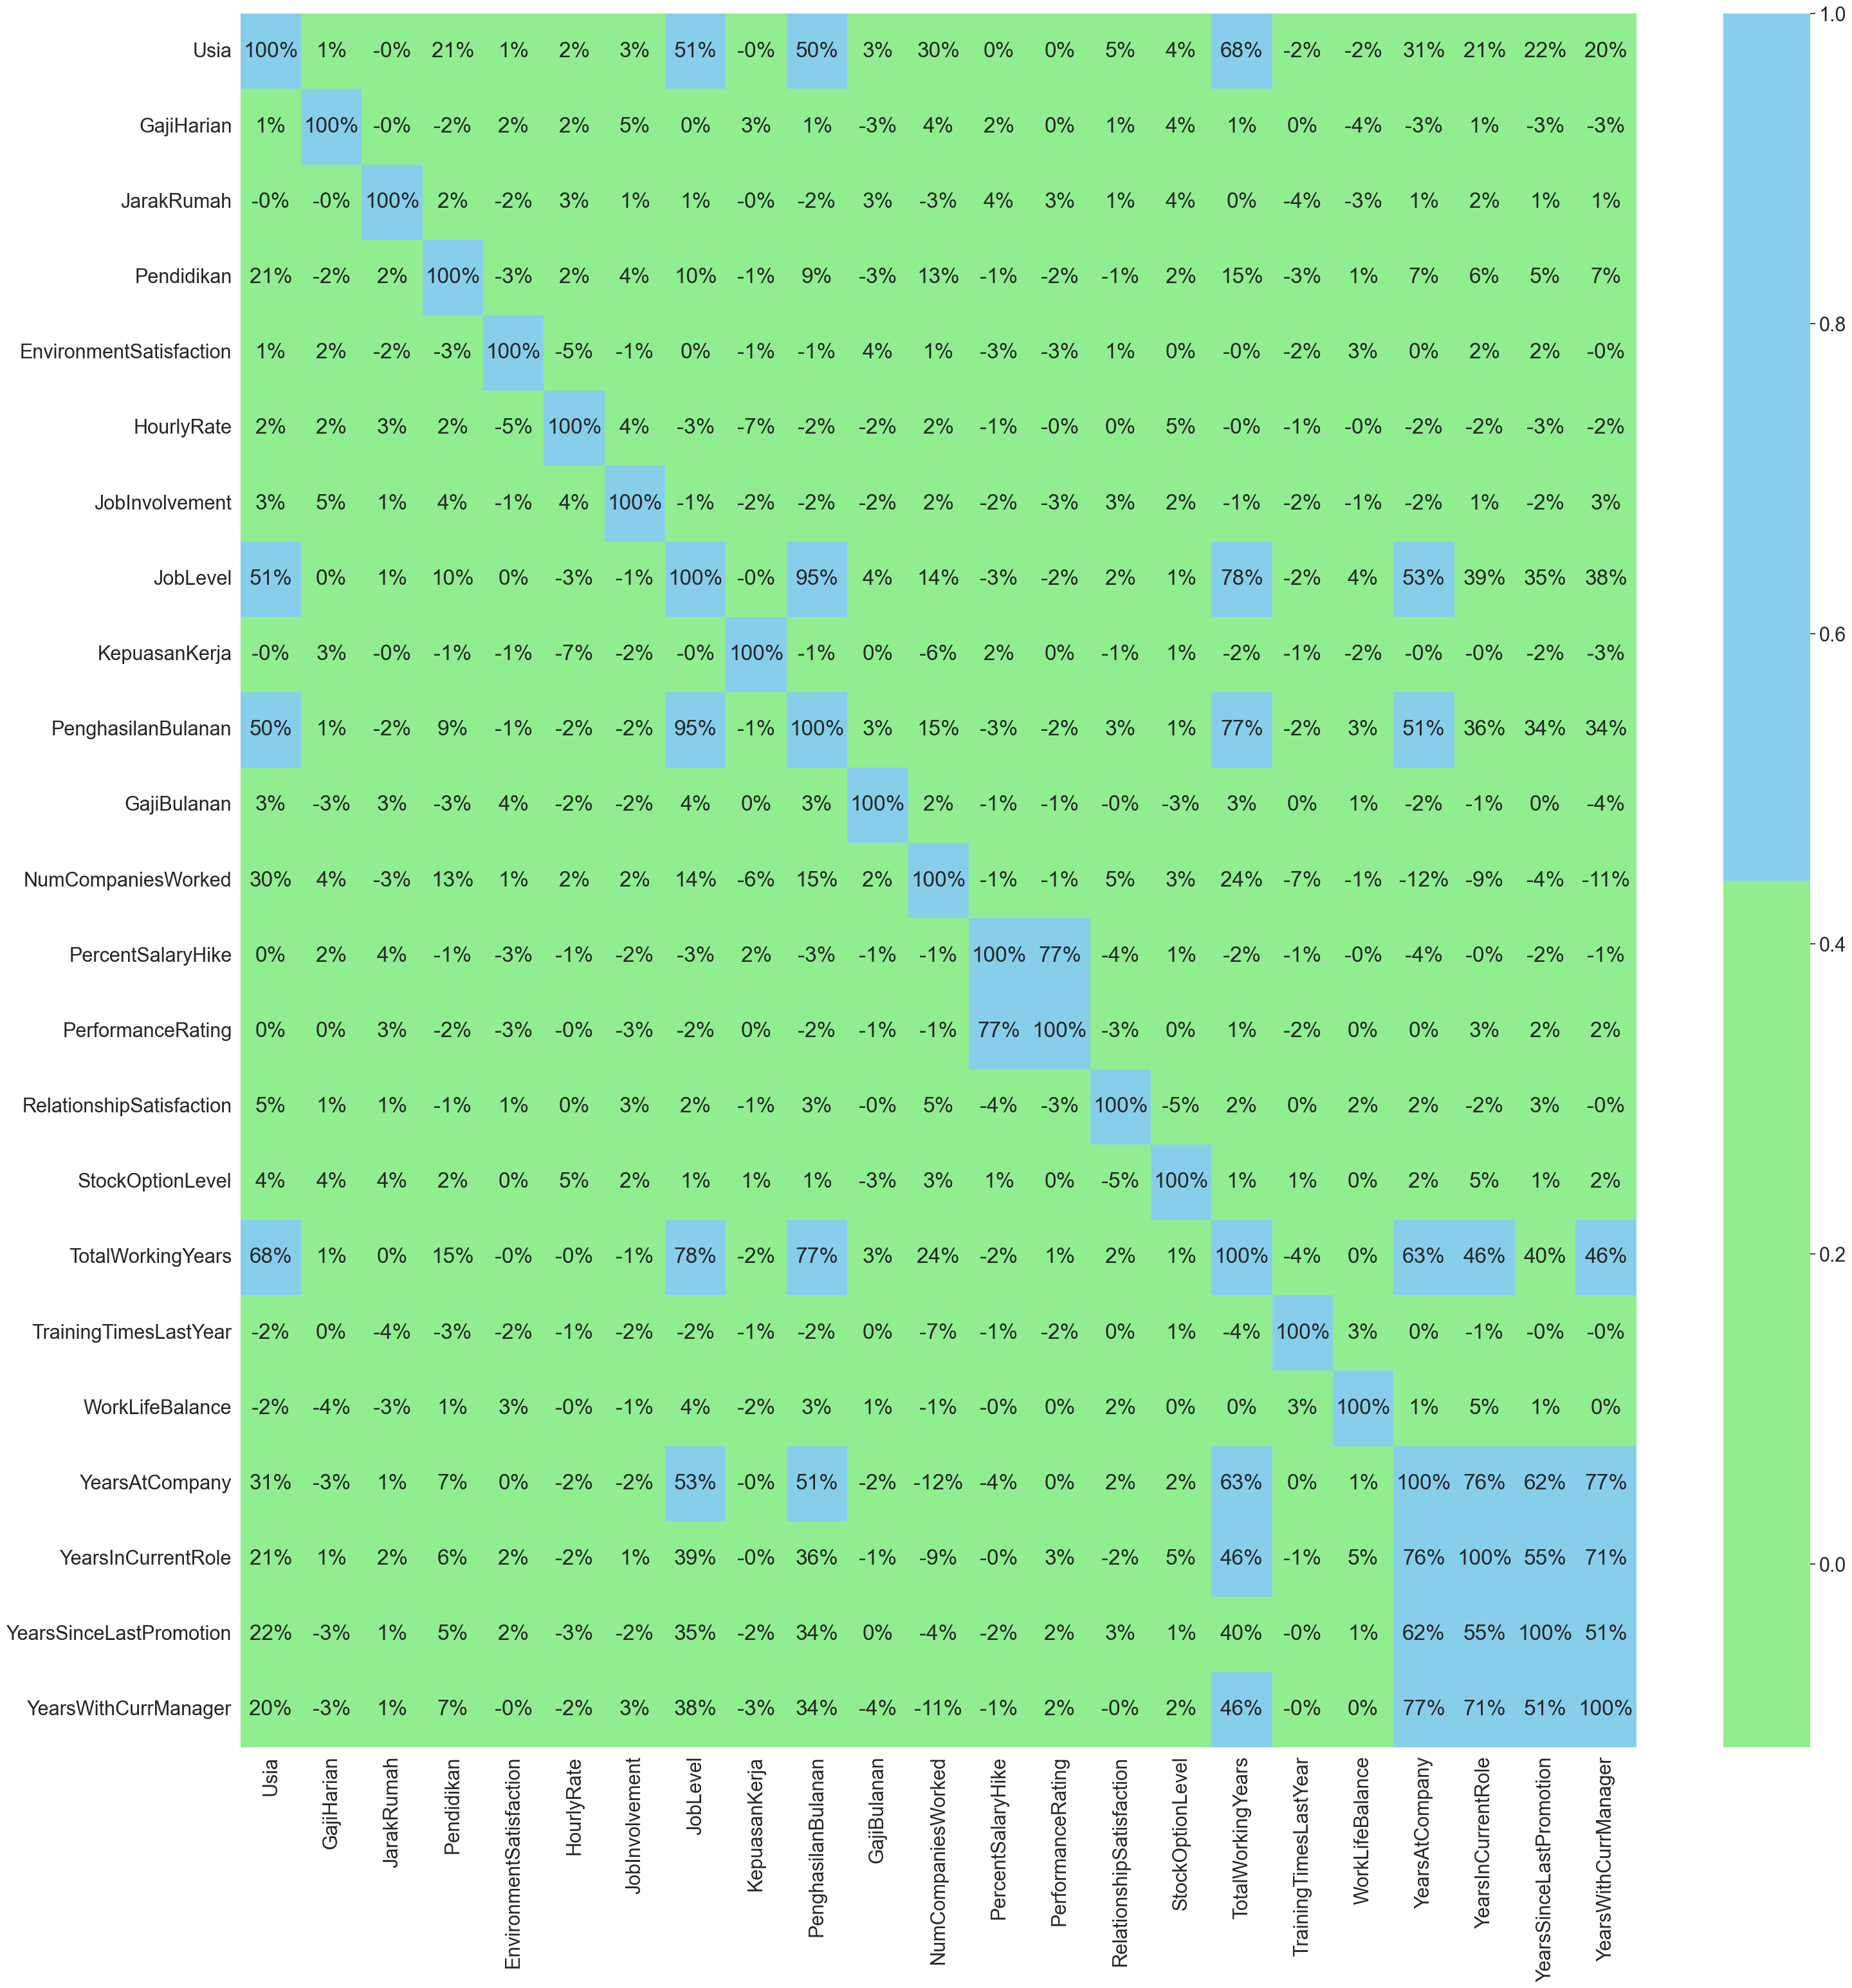

In [21]:
# Separate X and y variables
X = df[['Usia', 'GajiHarian', 'JarakRumah', 'Pendidikan', 'EnvironmentSatisfaction', 
          'HourlyRate', 'JobInvolvement', 'JobLevel', 'KepuasanKerja', 'PenghasilanBulanan', 
          'GajiBulanan', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
          'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
          'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
          'YearsSinceLastPromotion', 'YearsWithCurrManager']]

y = df[['Attrition']].values.ravel()

# Create a correlation matrix
corr_matrix = X.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(35,35))
sns.heatmap(corr_matrix, annot=True, fmt='.0%', cmap=sns.color_palette(['lightgreen', 'skyblue']))

# Show the plot
plt.show()

Beberapa temuan penting dari visualisasi heatmap korelasi adalah sebagai berikut:

Usia memiliki korelasi sebesar 68% dengan Total Working Years. Hal ini menunjukkan bahwa semakin lama seseorang bekerja, maka usianya juga semakin bertambah — sebuah kesimpulan yang logis.

Job Level memiliki korelasi sebesar 78% dengan Total Working Years. Artinya, semakin lama seseorang bekerja dalam suatu perusahaan, semakin besar kemungkinan ia mendapatkan promosi ke level pekerjaan yang lebih tinggi.

Penghasilan Bulanan memiliki korelasi sebesar 77% dengan Total Working Years. Hal ini mengindikasikan bahwa semakin lama seseorang bekerja, semakin besar pula kemungkinan untuk memperoleh gaji yang lebih tinggi.

Penghasilan Bulanan memiliki korelasi sangat tinggi, yaitu 95%, dengan Job Level. Ini menunjukkan bahwa level pekerjaan yang lebih tinggi berkaitan langsung dengan skala gaji yang lebih besar.

### To Check for Outliers In Dataset

Selanjutnya, memeriksa outlier yang terdapat dalam dataset. 
Outlier adalah nilai yang jarang muncul atau berbeda jauh dibandingkan nilai-nilai lain pada suatu kolom. 
Nilai yang berada di luar batas minimum dan maksimum dianggap sebagai outlier. 
Keberadaan outlier dapat menyebabkan bias pada model Machine Learning, sehingga sangat penting untuk ditangani dengan tepat. 
Selain itu, analisis outlier juga membantu memberikan gambaran mengenai distribusi data.

In [22]:
out = df[['Usia','JarakRumah','EnvironmentSatisfaction','KepuasanKerja',
          'StockOptionLevel','YearsInCurrentRole','YearsSinceLastPromotion',
          'TotalWorkingYears','YearsWithCurrManager']]

<Axes: >

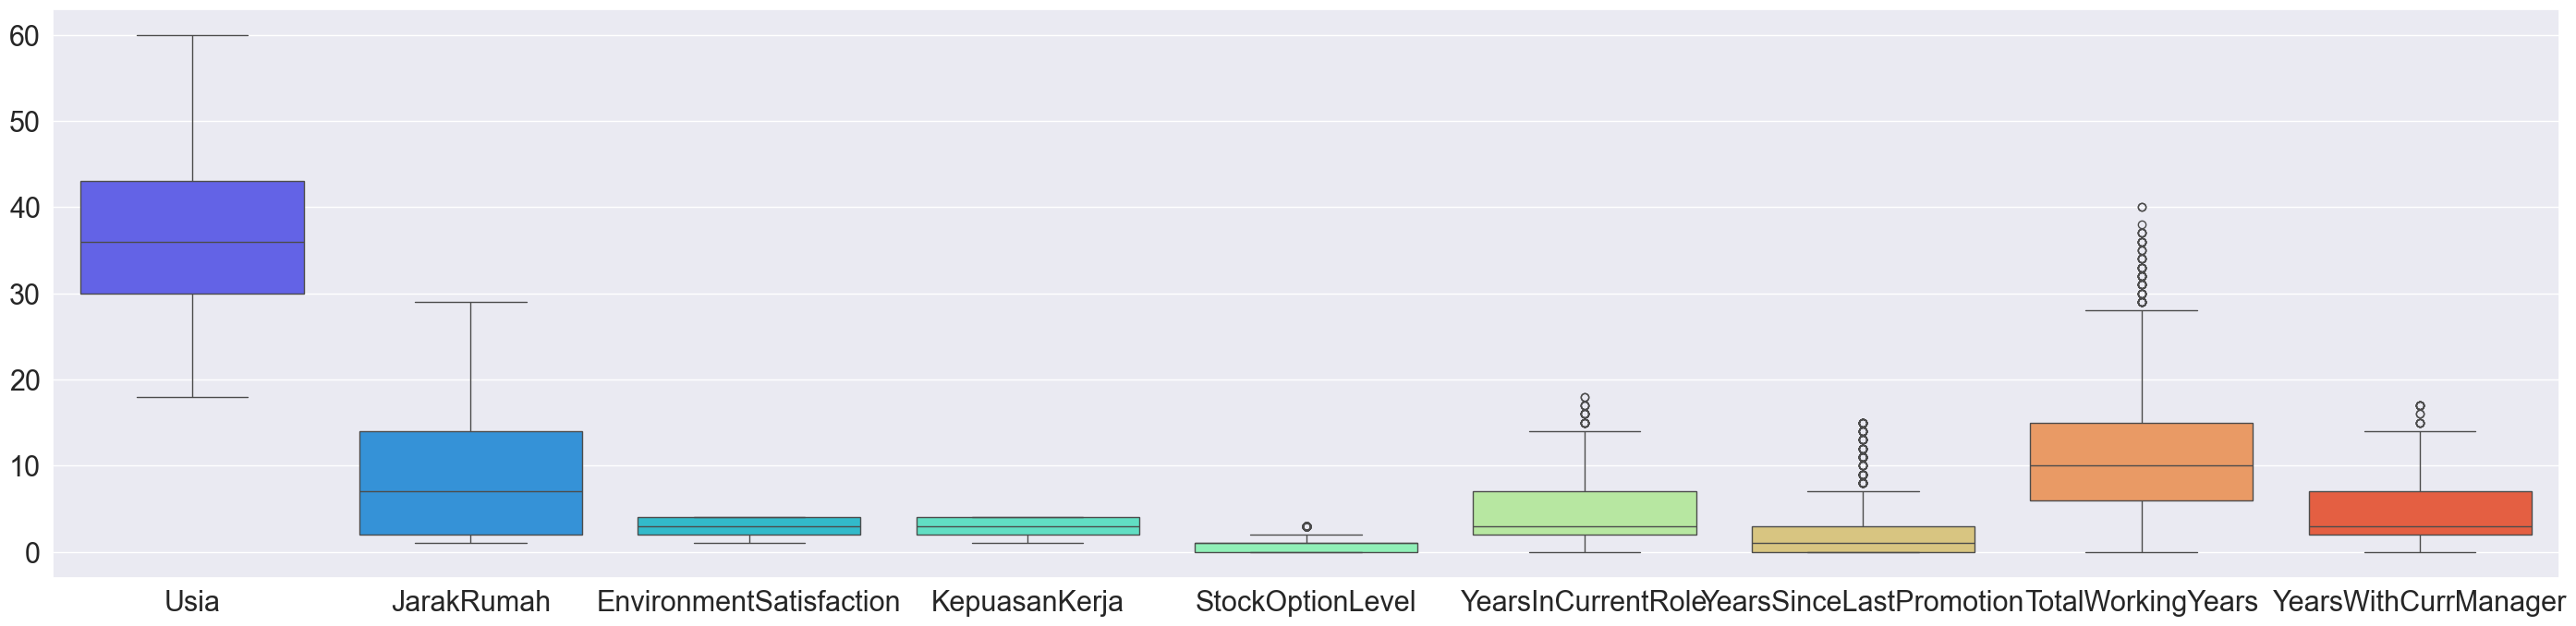

In [23]:
plt.figure(figsize=(35,8))#sets the figure size
sns.boxplot(data=out, palette='rainbow')#plotting the box plot after removing the outliers using seaborn

<Axes: >

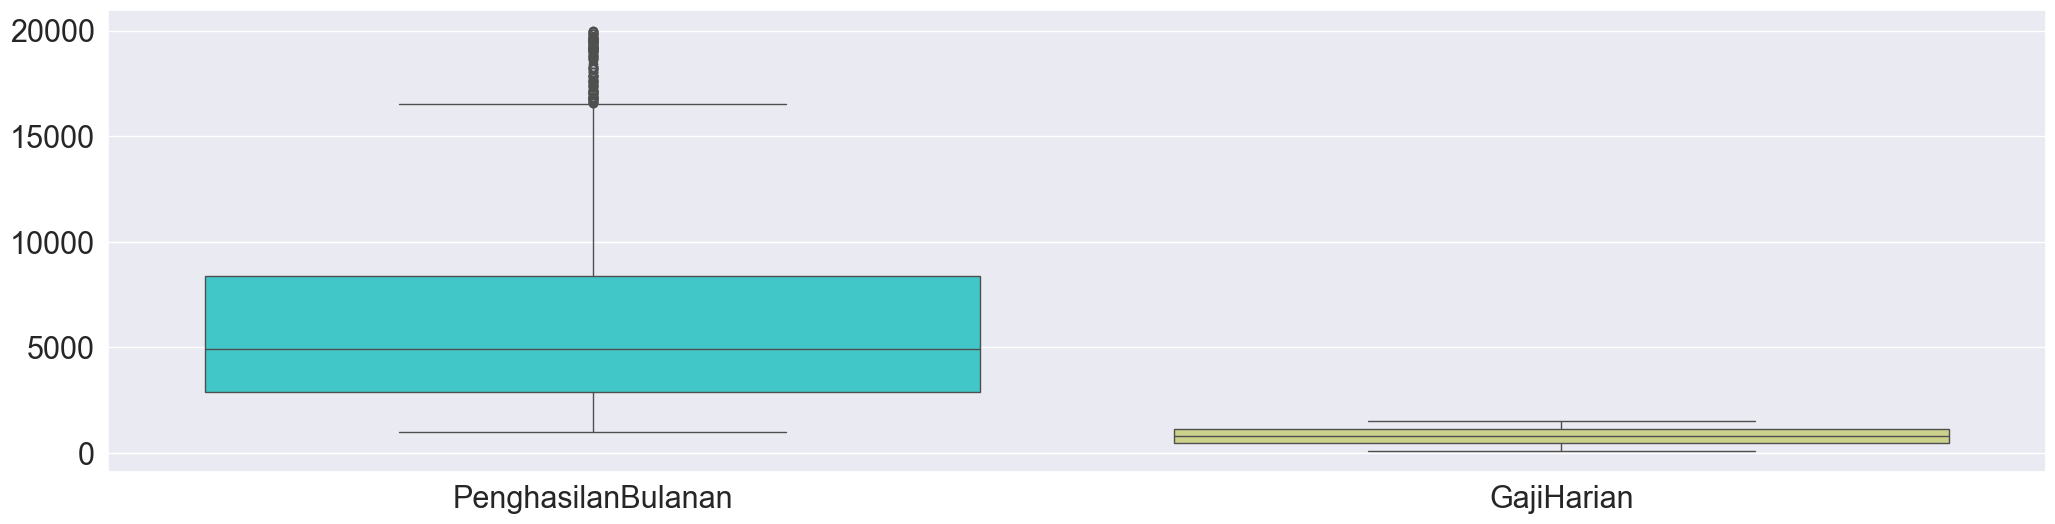

In [24]:
#checking for the outliers in monthly income and dailyrate
out1 = df[['PenghasilanBulanan','GajiHarian']]
plt.figure(figsize=(25,6))                      #sets the figure size
sns.boxplot(data=out1, palette='rainbow')       #plotting the box plot after removing the outliers using seaborn

Dari hasil visualisasi boxplot dapat diperoleh beberapa temuan penting:

Boxplot menampilkan lima ringkasan statistik utama dari setiap atribut, yaitu nilai minimum, kuartil pertama (Q1), median, kuartil ketiga (Q3), dan maksimum.

Terlihat adanya outlier pada kolom YearsInCurrentRole, YearsSinceLastPromotion, TotalWorkingYears, dan YearsWithCurrManager. Namun, jumlah outlier tersebut relatif sedikit sehingga tidak memengaruhi analisis secara keseluruhan.

Hal ini mengindikasikan bahwa terdapat beberapa karyawan yang bekerja pada peran saat ini dan bersama manajer yang sama selama lebih dari 15 tahun, serta ada yang tidak mendapat promosi selama lebih dari 8 tahun. Kondisi ini dapat menjadi salah satu alasan meningkatnya tingkat attrition.

Pada variabel PenghasilanBulanan, terlihat beberapa karyawan menerima gaji lebih tinggi dibandingkan kisaran normal, sementara rata-rata gaji berada pada kisaran 5.000. Sedangkan untuk GajiHarian (DailyRate), tidak ditemukan adanya outlier.

Dengan demikian, outlier pada dataset ini dapat diabaikan karena tidak akan berdampak signifikan terhadap hasil analisis maupun prediksi.

### Data Interpretation - Questionnaire


menggunakan beberapa pertanyaan penelitian untuk mempelajari dan menginterpretasikan dataset sehingga dapat diperoleh insight yang lebih mendalam. Untuk menjawab pertanyaan-pertanyaan tersebut, akan digunakan bantuan visualisasi data.

### Question 1: Bagaimana hubungan antara attrition dengan usia karyawan?

In [25]:
# Show the number of employees that left and stayed by age
color_map = {'Yes': 'lightgreen', 'No': 'skyblue'}

age_att = df.groupby(['Usia','Attrition']).apply(lambda x: x['PenghasilanBulanan'].count()).reset_index(name='Counts')

px.line(
    age_att, 
    x='Usia', 
    y='Counts', 
    color='Attrition', 
    title='Jumlah Karyawan Berdasarkan Usia dan Status Attrition',
    color_discrete_map=color_map
)

C:\Users\Syifa Ayu Talitha M\AppData\Local\Temp\ipykernel_12988\3146855703.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_att = df.groupby(['Usia','Attrition']).apply(lambda x: x['PenghasilanBulanan'].count()).reset_index(name='Counts')


> 📊 Interpretasi Grafik: Attrition berdasarkan Usia

**Tingkat attrition tertinggi terjadi pada kelompok usia 28–32 tahun.**

Setelah usia tersebut, tingkat attrition cenderung menurun seiring bertambahnya usia, karena karyawan lebih mencari stabilitas dalam pekerjaan.

Pada usia yang sangat muda (18–20 tahun), kemungkinan keluar dari perusahaan lebih tinggi, biasanya karena mereka masih berada pada tahap eksplorasi karier.

Pada usia 21 tahun, terlihat titik break-even, di mana jumlah karyawan yang keluar mulai seimbang dan setelahnya tren attrition lebih terkendali.

### Question 2: Apakah pendapatan merupakan faktor utama yang menyebabkan keluarnya karyawan?

In [26]:
# Group data by PenghasilanBulanan (dibulatkan) dan Attrition
rate_att = (
    df.assign(PenghasilanBulanan=df['PenghasilanBulanan'].round(-3))   # langsung bulatkan
      .groupby(['PenghasilanBulanan','Attrition'])
      .size()
      .reset_index(name='Counts')   # reset index supaya jadi kolom biasa
)

# Buat line plot
fig = px.line(
    rate_att, 
    x='PenghasilanBulanan', 
    y='Counts', 
    color='Attrition',
    title='Distribusi Karyawan Berdasarkan Penghasilan Bulanan dan Status Attrition',
    color_discrete_sequence=['#8CE68C', '#87CDF6']
)

fig.show()

> Interpretasi Grafik Penghasilan vs Attrition:

**Tingkat attrition sangat tinggi pada karyawan dengan penghasilan bulanan rendah (< 5k).**

Setelah itu attrition menurun, namun ada lonjakan kecil di sekitar 10k, yang bisa dikaitkan dengan karyawan kelas menengah yang mencari standar hidup lebih baik.

Pada tingkat penghasilan yang lebih tinggi, garis attrition cenderung datar, artinya karyawan dengan gaji lebih tinggi cenderung bertahan di perusahaan.

### Question 3: apakah Departemen Pekerjaan mempengaruhi pengurangan tenaga kerja??

In [27]:
color_map2 = {'Yes': 'lightgreen', 'No': 'skyblue'}

dept_att = (
    df.groupby(['Department','Attrition'])
      .apply(lambda x: x['GajiHarian'].count())
      .reset_index(name='Counts')
)

fig = px.bar(
    dept_att, 
    x='Department', 
    y='Counts', 
    color='Attrition',
    title='Jumlah Karyawan per Departemen berdasarkan Status Attrition',
    color_discrete_map=color_map2
)

fig.show()

C:\Users\Syifa Ayu Talitha M\AppData\Local\Temp\ipykernel_12988\3735805053.py:5: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



>Data hanya mencakup 3 departemen utama. Dari hasil visualisasi terlihat:

Sales memiliki tingkat attrition tertinggi (25.84%).

Disusul Human Resource (19.05%).

**Research & Development justru paling rendah (13.83%)**, menunjukkan stabilitas dan kepuasan kerja yang lebih baik.

### Question 4: Bagaimana Kepuasan Kerja Diri Mempengaruhi Attrition?

In [28]:
# Group the data by KepuasanKerja and Attrition, lalu hitung jumlah kemunculan
jsats_att = (
    df.groupby(['KepuasanKerja', 'Attrition'])['GajiHarian']
      .count()
      .reset_index(name='Counts')
)

# Buat area plot
fig = px.area(
    jsats_att, 
    x='KepuasanKerja', 
    y='Counts', 
    color='Attrition',
    title='Jumlah Kepuasan Kerja berdasarkan Status Attrition',
    color_discrete_map=color_map2
)

fig.show()

> Interpretasi:

**Semakin tinggi tingkat kepuasan kerja, tingkat attrition cenderung menurun.**

Pada rentang 1–2, attrition turun, tetapi justru naik lagi pada rentang 2–3, kemungkinan karena karyawan mulai mencari peluang yang lebih baik.

### Question 5: Bagaimana Work Life Balance memengaruhi tingkat pergantian karyawan secara keseluruhan

In [29]:
# Group the data by WorkLifeBalance and Attrition and count the number of occurrences
wlb_att = df.groupby(['WorkLifeBalance', 'Attrition'])['GajiHarian'].count().reset_index(name='Counts')

# Create the bar plot
fig = px.bar(
    wlb_att, 
    x='WorkLifeBalance', 
    y='Counts', 
    color='Attrition',
    title='Jumlah Work Life Balance berdasarkan Status Attrition', 
    color_discrete_map=color_map2
)

# Show the plot
fig.show()

>Karyawan dengan tingkat Work Life Balance rendah cenderung tetap bertahan karena sudah menyesuaikan diri dengan pekerjaannya. Namun, saat Work Life Balance meningkat ke level sedang, ada kecenderungan attrition naik karena karyawan mulai menginginkan kehidupan yang lebih baik. Pada level Work Life Balance yang sangat baik, attrition kembali turun karena karyawan merasa puas dengan pekerjaannya.

### Machine Learning Algorithms for Attrition Prediction

seberapa akurat kita dapat memprediksi apakah seorang karyawan akan bertahan atau mengundurkan diri dengan variabel-variabel ini

In [30]:
#Transform non numerical columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [31]:
#create new column
df['Age'] = df['Usia']

In [32]:
#drop the age column
df = df.drop('Usia', axis = 1)

In [33]:
df.head()

,Attrition,BusinessTravel,GajiHarian,Department,JarakRumah,Pendidikan,BidangPendidikan,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,KepuasanKerja,StatusPernikahan,PenghasilanBulanan,GajiBulanan,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age
0,1,2,624,2,0,1,2,1,1,64,2,1,7,3,1,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,2,2,0,31,1,1,6,1,2,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,1,3,0,62,1,0,2,2,1,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,2,3,1,26,2,0,6,2,2,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,4,0,0,10,2,0,2,1,2,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,9


PenghasilanBulanan, Age, OverTime, GajiHarian, YearsAtCompany, GajiBulanan, HourlyRate, NumCompaniesWorked, JarakRumah, YearsWithCurrManager, YearsInCurrentRole, EnvironmentSatisfaction, TotalWorkingYears

In [34]:
#Split the data and create an independent x data set and dependent y data set
X = df.iloc[:,1:df.shape[1]].values
Y = df.iloc[:,0].values

#0 indicated: no attrition - employee is working at the company
#1 indicates: there is attrition - employee resigned the company

In [35]:
X = df.iloc[:,1:df.shape[1]].values
Y = df.iloc[:,0].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [36]:
X.shape
X_train.shape

(1102, 30)

In [37]:
Y.shape
X_test.shape

(368, 30)

coba prediksi, untuk semua input yang diberikan, seberapa akurat dapat memprediksi tingkat atriisi menggunakan algoritma ML di bawah ini.

**Algorithm applied: Random forest classification**

In [57]:
rfcm = RandomForestClassifier(criterion='gini', max_depth=15, max_features='sqrt', min_samples_split=4, n_estimators=500, random_state=42)

rfcm.fit(X_train, Y_train)

Y_pred = rfcm.predict(X_test)

parameter GSCV

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],        
}

In [40]:
## komputasi lama

# grid_search_rf = GridSearchCV(
#     estimator=rfcm,
#     param_grid=param_grid_rf,
#     scoring='accuracy',
#     cv=5,
#     n_jobs=-1,)

# grid_search_rf.fit(X_train, Y_train)  

In [41]:
from joblib import parallel_backend
from sklearn.model_selection import GridSearchCV


with parallel_backend('loky', n_jobs=-1):
    grid_search_rf = GridSearchCV(
        estimator=rfcm,
        param_grid=param_grid_rf,
        cv=5 )

grid_search_rf.fit(X_train, Y_train)

c:\Users\Syifa Ayu Talitha M\Documents\Intern ASDP\EMPLOYEEATT\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


3600 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Syifa Ayu Talitha M\Documents\Intern ASDP\EMPLOYEEATT\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Syifa Ayu Talitha M\Documents\Intern ASDP\EMPLOYEEATT\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\Syifa Ayu Talitha M\Documents\

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_split': [1, 2, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [43]:
best_model_rf = grid_search_rf.best_estimator_
Y_pred = best_model_rf.predict(X_test)

print("Best Parameters:", grid_search_rf.best_params_)
print("Rata-rata Akurasi (Cross-Validation):", grid_search_rf.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 500}
Rata-rata Akurasi (Cross-Validation): 0.8602303578774168


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = rfcm.score(X_test, Y_test)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8723
Precision: 0.8379
Recall: 0.8723
F1 Score: 0.8323


In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [60]:
print("\nClassification Report:\n", metrics.classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.56      0.10      0.18        48

    accuracy                           0.87       368
   macro avg       0.72      0.55      0.55       368
weighted avg       0.84      0.87      0.83       368



**akurasi model ini adalah 87%** menggunakan **random forest algorithm**. Model ini mengidentifikasi 87% karyawan yang keluar dari perusahaan dengan tepat.

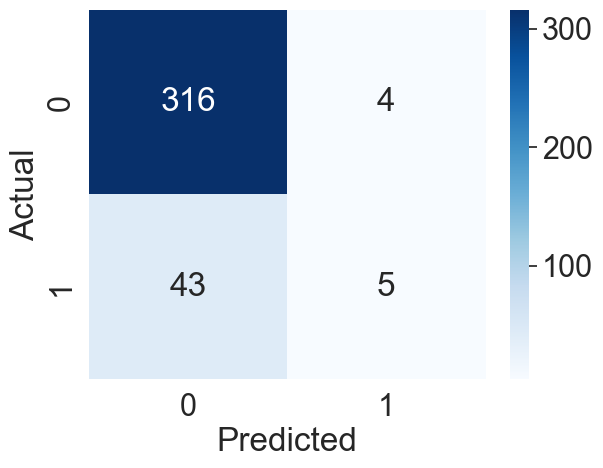

In [61]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### apa saja fitur/variabel penting yang menurut model tersebut.

In [62]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(best_model_rf.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
PenghasilanBulanan,0.086
OverTime,0.068
Age,0.064
TotalWorkingYears,0.057
GajiHarian,0.054
GajiBulanan,0.049
HourlyRate,0.046
JarakRumah,0.043
YearsAtCompany,0.043


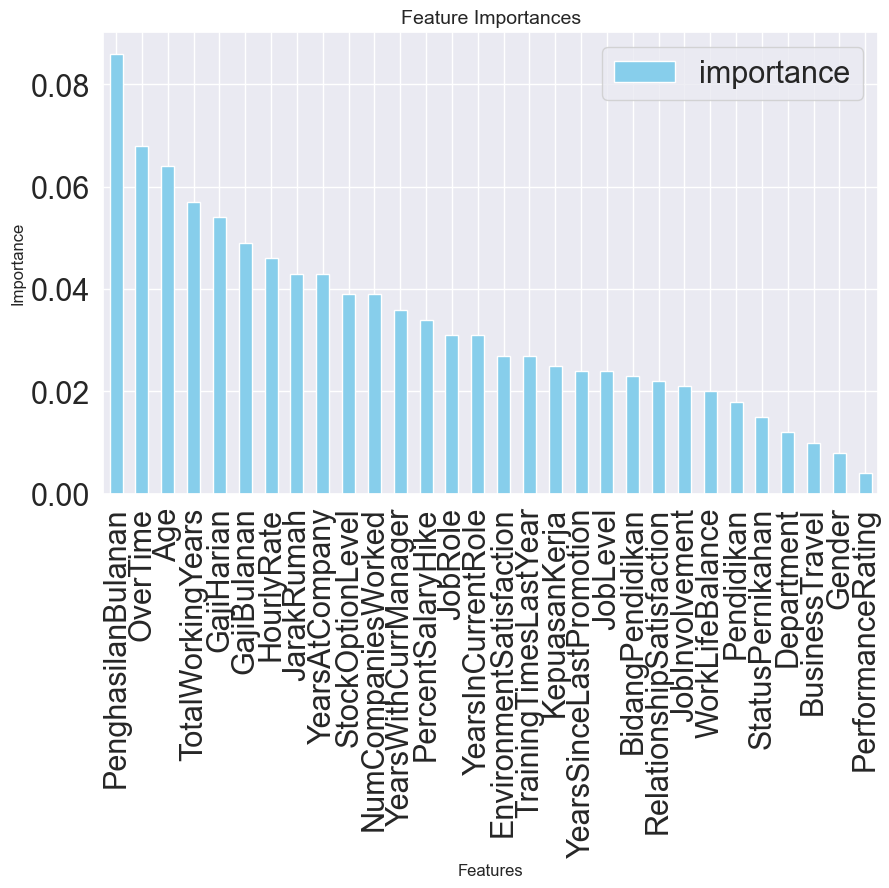

In [63]:
importances.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

Pendapatan bulanan tampaknya menjadi faktor terpenting, diikuti oleh usia, lembur, Total Bekerja, dan Gaji Harian. Melihat hasil ini, saya ingin tahu apakah orang dengan pendapatan lebih tinggi lebih kecil kemungkinannya untuk keluar dibandingkan orang dengan pendapatan lebih rendah.

---
### Conclusion: 

Berdasarkan analisis terhadap dataset, diperoleh beberapa kesimpulan:

- Model yang dibangun memiliki akurasi sebesar 87%, sehingga dapat dikatakan cukup baik dalam memprediksi attrition.


- Faktor yang paling berpengaruh terhadap attrition adalah penghasilan bulanan, lama bekerja di perusahaan dan usia.


- Model ini dapat membantu perusahaan mengidentifikasi karyawan dengan risiko tinggi untuk keluar, sehingga dapat dilakukan langkah pencegahan lebih dini.


- Strategi yang dapat diterapkan untuk meningkatkan retensi karyawan antara lain: Memberikan kompensasi dan benefit yang kompetitif. Menyediakan kesempatan pengembangan karier dan pelatihan. Menciptakan lingkungan kerja yang positif dan mendukung.

Secara keseluruhan, analisis ini menunjukkan bahwa sangat penting untuk memahami tren tenaga kerja, mendukung pengambilan keputusan strategis, serta mengurangi biaya akibat tingginya turnover karyawan.


### Deployment 

In [64]:
df.columns.unique()

Index(['Attrition', 'BusinessTravel', 'GajiHarian', 'Department', 'JarakRumah',
       'Pendidikan', 'BidangPendidikan', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'KepuasanKerja',
       'StatusPernikahan', 'PenghasilanBulanan', 'GajiBulanan',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age'],
      dtype='object')

In [65]:
df.shape

(1470, 31)

In [66]:
df

,Attrition,BusinessTravel,GajiHarian,Department,JarakRumah,Pendidikan,BidangPendidikan,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,KepuasanKerja,StatusPernikahan,PenghasilanBulanan,GajiBulanan,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age
0,1,2,624,2,0,1,2,1,1,64,2,1,7,3,1,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,2,2,0,31,1,1,6,1,2,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,1,3,0,62,1,0,2,2,1,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,2,3,1,26,2,0,6,2,2,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,4,0,0,10,2,0,2,1,2,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,4,2,0,11,3,1,2,3,2,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,4,3,0,12,1,2,0,0,2,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,2,1,0,57,3,1,4,1,2,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,4,3,0,33,1,1,7,1,2,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8,31


train model dengan hasil fitur importance untuk deployment

In [69]:
import pickle

# Simpan model ke file .pkl
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rfcm, f)

print("✅ Model berhasil disimpan ke rf_model.pkl")

✅ Model berhasil disimpan ke rf_model.pkl


1 = atrisi
0 = no atrisi

In [70]:
df['Attrition'].value_counts(normalize=True)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64